### Обучение без учителя

#### Задание 1

* Импортируйте библиотеки pandas, numpy и matplotlib.
* Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
* Создайте датафреймы X и y из этих данных.
* Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
* Масштабируйте данные с помощью StandardScaler.
* Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

* Постройте диаграмму рассеяния на этих данных.

In [4]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [16]:
#Загрузка данных
boston = load_boston()
features_names = boston.feature_names
target = boston.target
X = pd.DataFrame(boston.data, columns = features_names)
y = pd.DataFrame(target)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
#Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#display(X_test)
#display(X_test_scaled)

Text(0, 0.5, 'Значение второй компоненты')

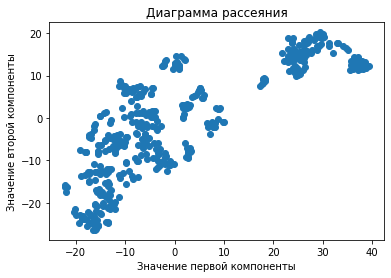

In [25]:
#Обучение
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_TSNE = tsne.fit_transform(X_train_scaled)
#display(X_train_TSNE)
#Визуализация
plt.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1])
plt.title ('Диаграмма рассеяния')
plt.xlabel('Значение первой компоненты')
plt.ylabel('Значение второй компоненты')

Видны 2 кластера данных, разделим их в следующем задании еще детальнее (на три)

#### Задание 2

* С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
* Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
* Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
* Вычислите средние значения price и CRIM в разных кластерах.

Среднее значения пресупности и цены для кластера 1
- уровень преступности: 0.4
- цена: 25.0

Среднее значения пресупности и цены для кластера 2
- уровень преступности: 10.8
- цена: 16.2

Среднее значения пресупности и цены для кластера 3
- уровень преступности: 0.1
- цена: 27.8



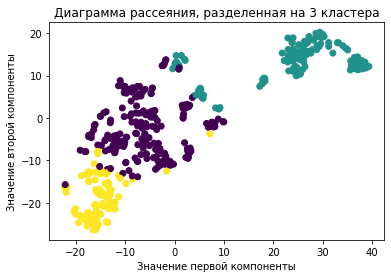

In [78]:
#Кластеризация данных
k_means = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = k_means.fit_predict(X_train_scaled)
#Визуализация
plt.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1], c = labels_train )
plt.title ('Диаграмма рассеяния, разделенная на 3 кластера')
plt.xlabel('Значение первой компоненты')
plt.ylabel('Значение второй компоненты')
#Средние значения кластеров
for claster in np.unique(labels_train):
    print('Среднее значения пресупности и цены для кластера',claster + 1)
    print('- уровень преступности:',
          round(X_train.loc[labels_train == claster, 'CRIM'].mean(),1))
    print('- цена:',
          round(y_train.loc[labels_train == claster].mean().values[0],1))
    print('')

#### Задание 3

* Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
* Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [77]:
#Подготовка данных
labels_test = k_means.fit_predict(X_test_scaled)
#Средние значения кластеров
for claster in np.unique(labels_train):
    print('Среднее значения пресупности и цены на тестовых данных для кластера',claster + 1)
    print('- уровень преступности:',
          round(X_test.loc[labels_test == claster, 'CRIM'].mean(),1))
    print('- цена:',
          round(y_test.loc[labels_test == claster].mean().values[0],1))
    print('')

Среднее значения пресупности и цены на тестовых данных для кластера 1
- уровень преступности: 9.4
- цена: 16.7

Среднее значения пресупности и цены на тестовых данных для кластера 2
- уровень преступности: 0.2
- цена: 22.7

Среднее значения пресупности и цены на тестовых данных для кластера 3
- уровень преступности: 0.0
- цена: 34.3

